# Microeconometrics Project - Are Credit Markets Still Local? Evidence from Bank Branch Closings. 

## Introduction
Scope of this Project is to replicate a the study **"Are Credit Markets Still Local? Evidence from Bank Branch Closings."** written by **Hoai-Luu Q. Nguyen**  published in *AMERICAN ECONOMIC JOURNAL: APPLIED ECONOMICS VOL. 11, NO. 1, JANUARY 2019*. <br> <br>

Data and Stata-files are provided by the American Economic Association:<br>
<href>https://www.aeaweb.org/articles?id=10.1257/app.20170543</href><br>



**Hyothesis:** Does the distance to bank branches effect credit allocation?<br>

**Identification Issue:** Openings and closings of bank branches are not random assignments<br>

**Idea:** Using the impact of post-merger branch closings to measure the effect on lending <br>
          => *Key assumption:* merger decision is exogenous to local economic conditions (census tract)
          
**Data:**

        * census tract -> macro- and household data on tract level
        * Summary of Deposits -> branch data
        * Report of Changes -> merger and branch closing 
        * HMDA and CRA -> lending data
        
**Method:** 

        1. IV – “exposure to post-merger consolidation” as instrument for closings
	    2. DiD – to compare lending in exposed and control (census) tracts in the same county 

*Why does the author use two methods? - to allow for heterogeneity across tracts within a county (DiD)*

## Abstract
*This paper studies whether distance shapes credit allocation by estimating the impact of bank branch closings during the 2000s on local access to credit. To generate plausibly exogenous variation in the incidence of closings, I use an instrument based on within-county, tract-level variation in exposure to post-merger branch consolidation. Closings lead to a persistent decline in local small business lending. Annual originations fall by 453K USD after a closing, off a baseline of 4.7 million USD, and remain depressed for up to 6 years. The effects are very localized, dissipating within 6 miles, and are especially severe during the financial crisis.*

## Data and Methodology
The Author uses three main data sources. First, as the main source she uses the *census tract* published by the US Census Bureau. This tracts vary in size across different regions, while containing 4000 inhabitans. <br>
Second as to instrument exposure, she uses the data from the FDIC called *Summary of Deposits (SOD)*. This data set provides data on branches e.g. location, deposists, latitude and longitude. <br> 
Finally, data on merger activity and branch closings is provided by FDIC *Report of Changes*. Further data on loans and lenders is provided by the FFIEC *Home Mortgage Disclosure Act (HMDA)* and *Community Reinvestment Act (CRA)*<br>
Macroeconomic data is used from the *National Establishment Time-Series (NETS)* by Walls and Associates.<br> 
Datasets are merged on bank- and tract-level by using **GIS** software to map locations. 
In the end the sample consists of tracts based on exposure to large bank mergers. Data are for the 1999-2012 period. <br> <br>

In the first step the author tests whether branch closing affects local credit supply.
Since we can not rule out potential simultaneity issues between branch closing and credit supply, the athor uses an IV approach.
$$\text{Close}_{it} = \kappa_i + \psi_t + \rho X_{it} + \beta_e \text{Expose}_{it} + \omega_{it}$$
$$ y_{it} = \alpha_i + \gamma_t + \lambda X_{it} + \beta_c \text{Close}_{it} + \epsilon_{it} $$
Further to address the issue that the decision for a merger is not turely exogenous Nguyen expands her anaylsis by an Difference-in-Differences Approach. To compare tracts who experienced a merger and tracts without (treated and control tracts/groups) within a county. 
$$y_{icmt} = \alpha_i + (\gamma_t \times \sigma_c) + X_i \beta_t + \sum_{\tau} \delta_{\tau} (D_{mt}^{\tau} \times \text{Expose}_{icm}) + \epsilon_{icmt}$$
Where tract $i$ in county $c$ experienced merger $m$ in year $t$. $D_{mt}^{\tau}$ is a dummy variable equals one in year $t$ and $\tau$ years after merger $m$ is approved. The reduced model is independent of $\tau$, thus:
$$y_{icmt} = \alpha_i + (\gamma_t \times \sigma_c) + X_i \beta_t + \delta_{\text{POST}} (\text{POST}_{mt} \times \text{Closure}_{icm}) + \epsilon_{icmt}$$

## Causal Graph and Identification Issues

### Causal Graph 

![](graphs/causal_graph.png)

    * D - treatment variable "bank branch closings"
    * Y - dependend variable "lending activity"
    * X - bank specific controls
    * E - general economic controls
    * L - local economic controls
    * M - instrument "merger activity"
    * U - unobserved drivers of lending activity

### Identification 
The causal graph above pins down the relationships between banking and lending. There are multiple collider varibales, backdoorpaths, confounding varibales and reverse causality issues need to be solved to show causality. 

First consider our variable of interest, lending activiy. Since credit is an equilibirum concept, 
its very difficult to disentangle whether a change in lending activity is diven by a change in credit demand or supply. Second our treatment variable, bank branch closings, has an issue of reverse causality with lending activity. One can argue, that less demand for credit is affecting banks decision to close a branch in a certain location. While, we are testing whether the closing of a branch in a certain location affects credit availibility. This issues, can be solved by instrumenting bank branch closing with merger activity. The author argues, that the decision to close a branch after a merger is more driven by merger activity less then by local demand of lending. By controlling for bankspecific characteristics and general economic conditions the backdoor paths over $X$ and $E$ are blocked. Thus, the exogeneity and relevance conditions should be fullfilled.

Finally, two backdoorpaths need to be blocked. Which is done by controlling for general- ($E$) and local economic ($L$) conditions.

Since tracts and counties are differ in various characteristics, a concern on heterogeneity across tracts arises. The IV-approach is not able to control for such unobserved time invariante individual tract characteristics. Therefore the author expands the analysis by a difference in differences approach (DiD). This panel data method allows to account for heterogeneity. The idea is to compair treated and non-treated tracts within a county, while controlling for tract fixed-effects. General economic conditions within a county should be compairable, such that heterogeneity is not driving the results anymore. 

In [12]:
%reset -f
%clear
%load_ext autoreload
#%load_ext rpy2.ipython


# preface loading packages required for Python Data Science
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
from patsy import dmatrices
import matplotlib.pyplot as plt
from scipy import stats
from linearmodels import PanelOLS
#from auxiliary import *

%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# import dataset provided by AEA and inspect data structure
#df = pd.read_stata('data/replication_input.dta')
#df.head()

In [25]:
# looking for missing values
#df.isnull().sum()
#df.dropna()

In [26]:
# some summary statistics
#df.describe()

In [27]:
# list variables
#list(df)

In [28]:
# scatterplot to have a first impact
#plt.scatter(df.num_closings, df.pmortgage)
#plt.xlabel('number of branch closings')
#plt.ylabel('fraction of HH with a mortgages')

## Replication of Summary Stats

In [3]:
# Table 1: Merger Sample
df = pd.read_stata('data/replication_input.dta')
df = df[['acq_instname', 'out_instname', 'yr_approve', 'approved']]
df.drop_duplicates(keep='first', inplace=True)
df = df.sort_values(by='approved')
df = df[['acq_instname', 'out_instname', 'yr_approve']]
pd.options.display.float_format = '{:.0f}'.format
df = df.rename(index=str , columns={'acq_instname':'Buyer', 'out_instname':'Target', 'yr_approve':'Year approved'})
print(df.to_string(index=False))

                                   Buyer                                             Target  Year approved
 Manufacturers and Traders Trust Company                                      Allfirst Bank           2003
   Bank of America, National Association                                Fleet National Bank           2004
                      National City Bank                                 The Provident Bank           2004
                            Regions Bank          Union Planters Bank, National Association           2004
                     JPMorgan Chase Bank                     Bank One, National Association           2004
                         North Fork Bank                                    GreenPoint Bank           2004
                           SunTrust Bank                          National Bank of Commerce           2004
     Wachovia Bank, National Association                                    SouthTrust Bank           2004
                          Sovereign B

In [4]:
# Table 2: Merger Sammary Statistics
df = pd.read_stata('data/replication_input.dta')
df = df.filter(regex='mergerID|premerger_acq|premerger_out')
df.drop_duplicates(keep='first', inplace=True)
df_t = pd.DataFrame(columns=['Variable', 'Median', 'Min', 'Max'])
df = df.filter(regex='premerger_acq|premerger_out')
df_t['Variable'] = ['Total assets', 'Branches', 'States of operation', 'Countries of operation', 'Total assets', 'Branches', 'States of operation', 'Countries of operation']
df_t['Median']   = np.round(np.median(df, axis=0))
df_t['Min']      = np.round(np.nanmin(df, axis=0))
df_t['Max']      = np.round(np.nanmax(df, axis=0))
print(df_t.to_string(index=False))
#np.round(df.describe(percentiles=[.5]), 1).T # we only need min, 50% (median), max

               Variable   Median       Min         Max
           Total assets 81954710  25963401  1252402412
               Branches      696       254        5569
    States of operation        8         1          31
 Countries of operation      182        18         692
           Total assets 25955711  10426963   245783000
               Branches      277        28        1482
    States of operation        6         1          13
 Countries of operation       54         7         202


In [9]:
# todo add standard devidations in brackets
# Table 3: Summary Statistics for Exposed and Control Tracts
#df.assign(cntyID = df.sort_values(['state_fps', 'cnty_fps']))
filter_cols = 'poptot|popdensity|pminority|pcollege|pincome|medincome|pmortgage|cont_totalbranches|cont_brgrowth|cont_total_origin|cont_NumSBL_Rev1|Obs'
df = pd.read_stata('data/mergersample_controls.dta')
index = ['popdensity','poptot','medincome','pminority','pcollege','pmortgage','pincome','cont_totalbranches', 'cont_brgrowth','cont_NumSBL_Rev1','cont_total_origin']
df_t = pd.DataFrame(columns=['Variable', 'Exposed', 'All other', 'p-value 01', 'Control', 'p-value 02'], index=index)
df.drop_duplicates(keep='first', inplace=True)
df_exposed = df.loc[df.overlap==1]
df_exposed=df_exposed.assign(Obs=lambda df_exposed:len(df_exposed))
df_exposed = df_exposed.filter(regex=filter_cols).T
df = pd.read_stata('data/mergersample_controls.dta')
df.drop_duplicates(keep='first', inplace=True)
df_all     = df.loc[df.overlap==0]
df_all=df_all.assign(Obs=lambda df_all:len(df_all))
df_all     = df_all.filter(regex=filter_cols).T
df01 = pd.read_stata('data/replication_input.dta')
df01 = df01.filter(regex='state_fps|cnty_fps|tractstring|overlap|mergerID')
df01.drop_duplicates(keep='first', inplace=True)
df02 = pd.read_stata('data/mergersample_controls.dta')
df02.drop_duplicates(keep='first', inplace=True)
#df = pd.merge(df01,df02,  on=['state_fps','cnty_fps','tractstring','mergerID'], how='inner', suffixes=('', '_y'))
df = pd.merge(df01,df02,  on=['state_fps','cnty_fps','tractstring','mergerID'], how='inner')
df = df.loc[df.overlap_y==0]
df_control = df.groupby(['state_fps','cnty_fps'], as_index=True)
#df_control = df.groupby('state_fps')
df_control = df_control.agg(np.mean)
df_control = df.assign(Obs=lambda df:len(df))
df_control = df_control.filter(regex=filter_cols).T
df = df.filter(regex=filter_cols)
df_t['Variable']  = list(df)
df_t              = df_t.append({'Variable':'Obs'}, ignore_index=True)
df_t['Exposed']   = np.round(np.nanmean(df_exposed, axis=1), decimals=3)
df_t['All other'] = np.round(np.nanmean(df_all, axis=1), decimals=3)
ptemp = stats.ttest_ind(df_exposed, df_all, axis=1, equal_var=True, nan_policy='omit')
df_t['p-value 01']   = np.round(np.ma.getdata(ptemp[1]), decimals=3)
df_t['Control']   = np.round(np.nanmean(df_control, axis=1), decimals=3)
ptemp = stats.ttest_ind(df_exposed, df_control, axis=1, equal_var=True, nan_policy='omit')
df_t['p-value 02']   = np.round(np.ma.getdata(ptemp[1]), decimals=3)
filter_cols = ['poptot','popdensity','pminority','pcollege','pincome','medincome','pmortgage','cont_totalbranches','cont_brgrowth','cont_total_origin','cont_NumSBL_Rev1']

pd.options.display.float_format = '{:.3f}'.format
print(df_t.to_string(index=False))
#print(df_control)
#np.shape(ptemp)

           Variable   Exposed  All other  p-value 01   Control  p-value 02
         popdensity  2575.407   7206.310       0.000  6105.754       0.000
             poptot  5761.404   4571.781       0.000  5387.571       0.013
          medincome 44223.772  45451.951       0.304 52171.479       0.000
          pminority     0.211      0.386       0.000     0.238       0.039
           pcollege     0.309      0.256       0.000     0.341       0.002
          pmortgage     0.688      0.708       0.014     0.721       0.000
            pincome   114.473    101.963       0.000   118.616       0.149
 cont_totalbranches     5.849      1.141       0.000     3.816       0.000
      cont_brgrowth     0.053      0.030       0.011     0.065       0.185
   cont_NumSBL_Rev1   103.400     54.335       0.000    88.947       0.000
  cont_total_origin   277.220    227.091       0.000   281.016       0.723
                Obs   386.000  18027.000         nan  3087.000         nan


In [10]:
# todo add standard devidations in brackets
# Table 4: Representativeness of the Merger Sample
filter_cols = 'poptot|popdensity|pminority|pcollege|pincome|medincome|pmortgage|cont_totalbranches|cont_brgrowth|cont_total_origin|cont_NumSBL_Rev1|Obs'
df = pd.read_stata('data/alltract_controls.dta')
#index = ['popdensity','poptot','medincome','pminority','pcollege','pmortgage','pincome','cont_totalbranches', 'cont_brgrowth','cont_NumSBL_Rev1','cont_total_origin']
index = ['popdensity', 'poptot', 'medincome', 'pminority', 'pcollege', 'pmortgage', 'totalbranches', 'brgrowth', 'NumSBL_Rev1', 'total_origin', 'pincome', 'Obs']
df_t = pd.DataFrame(columns=['Variable', 'All', 'Closings', 'Merger'], index=index)
df.drop_duplicates(keep='first', inplace=True)

df_all = df.loc[df['year']>=2002]
df_all = df_all.loc[df_all['year']<=2007]
df_all = df_all.groupby(['state_fps', 'cnty_fps', 'tractstring'])
df_all = df_all.agg(np.nanmax)
#df_all = df_all.agg(np.nanmean)
df_all = df_all.loc[df_all['totalbranches']>0]
df_all['Obs'] = len(df_all)
df_all = df_all.agg(np.nanmean)
alltract_index = 'popdensity|poptot|medincome|pminority|pcollege|pmortgage|totalbranches|brgrowth|NumSBL_Rev1|total_origin|pincome|Obs'
df_all = df_all.filter(regex=alltract_index)

df_closing = df.loc[df['year']>=2002]
df_closing = df_closing.loc[df_closing['year']<=2007]
df_closing = df_closing.groupby(['state_fps', 'cnty_fps', 'tractstring'])
df_closing = df_closing.agg(np.nanmax)
df_closing = df_closing.loc[df_closing['num_closings']>0]
df_closing['Obs'] = len(df_closing)
df_closing = df_closing.agg(np.nanmean)
df_closing = df_closing.filter(regex=alltract_index).T

df = pd.read_stata('data/replication_input.dta')
#df_merger      = df.loc[df['year']==2001]
df_merger = df.loc[df['year']>=2002]
df_merger = df_merger.loc[df_merger['year']<=2007]
df01 = pd.read_stata('data/alltract_controls.dta')
df01.drop_duplicates(keep='first', inplace=True)
df_merger = pd.merge(df_merger,df01,  on=['state_fps','cnty_fps','tractstring'], how='inner', suffixes=('', '_y'))
df_merger = df_merger.groupby(['state_fps', 'cnty_fps', 'tractstring'])
df_merger = df_merger.agg(np.nanmax)
num= len(df_merger)
df_merger = df_merger.agg(np.nanmean)
df_merger.rename(index= {'cont_totalbranches': 'totalbranches', 'cont_brgrowth':'brgrowth', 'cont_NumSBL_Rev1':'NumSBL_Rev1','cont_total_origin':'total_origin'},  inplace = True)
df_merger = df_merger.filter(regex=alltract_index).T
df_merger = df_merger.iloc[4:15]
df_merger['Obs'] = num

df_t['Variable']  = list(index)
df_t['All']       = np.round(df_all, decimals=3)
df_t['Closings']  = np.round(df_closing, decimals=3)
df_t['Merger']    = np.round(df_merger, decimals=3)

pd.options.display.float_format = '{:.3f}'.format
print(df_t.to_string(index=False))

      Variable       All  Closings    Merger
    popdensity  4032.403  3615.265  6166.240
        poptot  4687.897  4941.796  5401.217
     medincome 44829.351 45248.801 51803.494
     pminority     0.195     0.197     0.234
      pcollege     0.247     0.272     0.337
     pmortgage     0.668     0.684     0.716
 totalbranches     2.611     3.893     4.095
      brgrowth     0.125     0.153     0.071
   NumSBL_Rev1    89.156   106.479    91.880
  total_origin   317.562   342.827   281.857
       pincome   104.267   106.273   119.300
           Obs 37041.000  7768.000  3003.000


In [12]:
# Table 5: Complier Characteristics

## calculating MEDIAN values
df = pd.read_stata('data/replication_input.dta')
index = ['popdensity','poptot','medincome','pminority','pcollege','pmortgage','pincome','cont_totalbranches', 'cont_brgrowth','cont_NumSBL_Rev1','cont_total_origin']
df.drop_duplicates(keep='first', inplace=True)
df=df.assign(event_year=lambda df:df.year-df.yr_approve)
df=df.loc[df['event_year']==1]
p50=df[index].median()

## estimate the proportion of ALWAYS TAKERS, NEVER TAKERS and COMPLIERS
df_at = df.loc[df['overlap']==0]
p_always = np.nanmean(df_at.closed_branch)
df_nt = df.assign(temp=lambda df:1-df.closed_branch)
df_nt = df_nt.loc[df_nt['overlap']==1]
p_never = np.nanmean(df_nt.temp)
p_comp=1-p_always-p_never

## ESTIMATE AVERAGE CHARACTERISTICS OVER SET OF ALWAYS TAKERS AND COMPLIERS COMBINED (i.e.,Treatment tracts who had closings)
df_t1 = pd.DataFrame(index=index)
df_atcomp = df.loc[df['overlap']==1]
df_atcomp = df_atcomp.loc[df_atcomp['closed_branch']==1]
n=len(df_atcomp)
for i in index:
    temp=df_atcomp[df_atcomp[i]>p50[i]].count()
    df_t1[i]=temp/n
df_t1=df_t1.T
df_atcomp=df_t1['poptot']

## ESTIMATE AVERAGE CHARACTERISTICS OVER ALWAYS TAKERS ONLY (i.e., Control tracts who had closings)
df_t2 = pd.DataFrame(index=index)
df_at = df.loc[df['overlap']==0]
df_at = df_at.loc[df_at['closed_branch']==1]
n=len(df_at)
for i in index:
    temp=df_at[df_at[i]>p50[i]].count()
    df_t2[i]=temp/n
df_t2=df_t2.T
df_at=df_t2['poptot']

##  ESTIMATE AVERAGE CHARACTERISTICS FOR COMPLIERS
ecomp=((p_always+p_comp)/p_comp)*(df_atcomp-((p_always/(p_always+p_comp))*df_at))
## CALCULATE RATIO
ratio=ecomp/0.5
## PRINT to Table
df_tab = pd.DataFrame(columns=['Variables','ecomp','ratio'], index=index)
df_tab['Variables']=list(df[index])
df_tab['ecomp']=ecomp*100
df_tab['ratio']=ratio
pd.options.display.float_format = '{:.3f}'.format
print(df_tab.to_string(index=False))

          Variables  ecomp  ratio
         popdensity 18.308  0.366
             poptot 57.533  1.151
          medincome 29.087  0.582
          pminority 60.262  1.205
           pcollege 47.011  0.940
          pmortgage 39.219  0.784
            pincome 41.426  0.829
 cont_totalbranches 86.497  1.730
      cont_brgrowth 49.612  0.992
   cont_NumSBL_Rev1 60.650  1.213
  cont_total_origin 48.051  0.961


## Replication of the Main Results

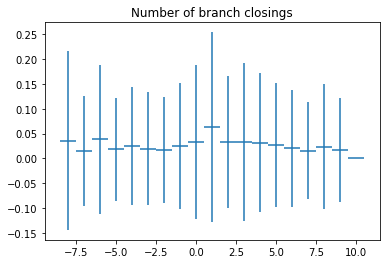

In [19]:
# Figure 2: Exposure to consolidation and the incidence of branch closings

df = pd.read_stata('data/replication_input.dta')
df.drop_duplicates(keep='first', inplace=True)
df=df.assign(event_year=lambda df:df.year-df.yr_approve)
index=list(df)
dfmean = pd.DataFrame(columns=range(-8, 10), index=index)
dfstd = pd.DataFrame(columns=range(-8, 10), index=index)
#df['num_closings']=(df['num_closings']-df['num_closings'].mean())/df['num_closings'].std()
df['num_closings']=(df['num_closings']-df['num_closings'].min())/(df['num_closings'].max()-df['num_closings'].min())
for i in range(-8, 11):
    dfmean[i]=df.loc[(df['event_year']==i) & df['overlap']==1].mean()
    dfstd[i]=df.loc[(df['event_year']==i) & df['overlap']==1].std()
dfmean=dfmean.T
dfstd=dfstd.T
mean=dfmean['num_closings']
std=dfstd['num_closings']
plt.errorbar(mean.index, mean, xerr=0.5, yerr=2*std, linestyle='')
plt.title('Number of branch closings')
plt.show()  

In [2]:
# Table 6: First-Stage and Reduced-Form estimates 
df = pd.read_stata('data/replication_input.dta')
df.drop_duplicates(keep='first', inplace=True)
df=df.assign(event_year=lambda df:df.year-df.yr_approve)
index=list(df)
df['group_timeID']= df.groupby(['state_fps', 'cnty_fps', 'year']).grouper.group_info[0]
df['indivID']= df.groupby(['state_fps', 'cnty_fps', 'tractstring']).grouper.group_info[0]
df['clustID']= df.groupby(['state_fps', 'cnty_fps']).grouper.group_info[0] 
df.set_index(['indivID', 'group_timeID'], inplace=True)

## estimates of column 1 (number of closings)
est_numclose= pd.DataFrame(columns=['beta', 'SE'], index=range(-8, 10))
beta=pd.DataFrame(index=range(-8, 10))
std=pd.DataFrame(index=range(-8, 10))
for i in range(-8, 11):
    df['D'] = 0
    df.loc[df['event_year'] >= i , 'D'] = 1
    temp=df.loc[(df['event_year']==i) & df['overlap']==1]
    #temp=df.loc[df['overlap']==1]
    y, x = dmatrices('num_closings ~ D + popdensity + poptot + medincome + pminority + pcollege +  cont_totalbranches + cont_brgrowth', data=temp)
    model_spec = sm.OLS(y, x)
    #model_spec = PanelOLS(temp.num_closings, temp[['D', 'popdensity', 'poptot', 'medincome', 'pminority', 'pcollege', 'cont_totalbranches', 'cont_brgrowth']], entity_effects=True)
    results = model_spec.fit(cov_type='HAC',cov_kwds={'maxlags':1})
    #results = model_spec.fit(cov_type='clustered', cluster_entity=True)
    #print(results.summary())
    beta[i]=results.params[2]
    std[i]=results.HC0_se[2]
#pd.options.display.float_format = '{:.3f}'.format
est_numclose['beta']=beta.T
est_numclose['SE']=std.T

## estimates of column 2 (total branches)
est_totalbranches= pd.DataFrame(columns=['beta', 'SE'], index=range(-8, 10))
for i in range(-8, 11):
    df['D'] = 0
    df.loc[df['event_year'] >= i , 'D'] = 1
    temp=df.loc[(df['event_year']==i) & df['overlap']==1]
    y, x = dmatrices('totalbranches ~ D + popdensity + poptot + medincome + pminority + pcollege +  cont_totalbranches + cont_brgrowth', data=temp)
    model_spec = sm.OLS(y, x)
    results = model_spec.fit(cov_type='HAC',cov_kwds={'maxlags':1})
    #model_spec = PanelOLS(temp.totalbranches, temp[['D', 'popdensity', 'poptot', 'medincome', 'pminority', 'pcollege', 'cont_totalbranches', 'cont_brgrowth']], entity_effects=True)
    #results = model_spec.fit(cov_type='clustered', cluster_entity=True)
    beta[i]=results.params[2]
    std[i]=results.HC0_se[2]
#pd.options.display.float_format = '{:.3f}'.format
est_totalbranches['beta']=beta.T
est_totalbranches['SE']=std.T

## estimates of column 3 (SBL origin)
est_SBLorigin= pd.DataFrame(columns=['beta', 'SE'], index=range(-8, 10))
for i in range(-8, 11):
    df['D'] = 0
    df.loc[df['event_year'] >= i , 'D'] = 1
    temp=df.loc[(df['event_year']==i) & df['overlap']==1]
    y, x = dmatrices('NumSBL_Rev1 ~ D + popdensity + poptot + medincome + pminority + pcollege +  cont_totalbranches + cont_brgrowth', data=temp)
    model_spec = sm.OLS(y, x)
    results = model_spec.fit(cov_type='HAC',cov_kwds={'maxlags':1})
    #model_spec = PanelOLS(temp.NumSBL_Rev1, temp[['D', 'popdensity', 'poptot', 'medincome', 'pminority', 'pcollege', 'cont_totalbranches', 'cont_brgrowth']], entity_effects=True)
    #results = model_spec.fit(cov_type='clustered', cluster_entity=True)
    beta[i]=results.params[2]
    std[i]=results.HC0_se[2]
#pd.options.display.float_format = '{:.3f}'.format
est_SBLorigin['beta']=beta.T
est_SBLorigin['SE']=std.T

## estimates of column 4 (Mortgage origin)
est_Morigin= pd.DataFrame(columns=['beta', 'SE'], index=range(-8, 10))
for i in range(-8, 11):
    df['D'] = 0
    df.loc[df['event_year'] >= i , 'D'] = 1
    temp=df.loc[(df['event_year']==i) & df['overlap']==1]
    y, x = dmatrices('total_origin ~ D + popdensity + poptot + medincome + pminority + pcollege +  cont_totalbranches + cont_brgrowth', data=temp)
    model_spec = sm.OLS(y, x)
    results = model_spec.fit(cov_type='HAC',cov_kwds={'maxlags':1})
    #model_spec = PanelOLS(temp.total_origin, temp[['D', 'popdensity', 'poptot', 'medincome', 'pminority', 'pcollege', 'cont_totalbranches', 'cont_brgrowth']], entity_effects=True)
    #results = model_spec.fit(cov_type='clustered', cluster_entity=True)
    beta[i]=results.params[2]
    std[i]=results.HC0_se[2]
#pd.options.display.float_format = '{:.3f}'.format
est_Morigin['beta']=beta.T
est_Morigin['SE']=std.T

## finish table 6 by producing a df containing all estimates
df_t= pd.DataFrame(columns=['Num_closings', 'Total_branches', 'SBL_origin', 'Mortgage_origin'], index=range(-8, 10))
df_t['Num_closings']      = est_totalbranches['beta']
df_t['Total_branches']    = est_totalbranches['beta']
df_t['SBL_origin']        = est_SBLorigin['beta']
df_t['Mortgage_origin']   = est_Morigin['beta']

ValueError: zero-size array to reduction operation maximum which has no identity

In [2]:
# Table 6: First-Stage and Reduced-Form estimates using R
df = pd.read_stata('data/replication_input.dta')
df.drop_duplicates(keep='first', inplace=True)
df=df.assign(event_year=lambda df:df.year-df.yr_approve)
index=list(df)
df['group_timeID']= df.groupby(['state_fps', 'cnty_fps', 'year']).grouper.group_info[0]
df['indivID']= df.groupby(['state_fps', 'cnty_fps', 'tractstring']).grouper.group_info[0]
df['clustID']= df.groupby(['state_fps', 'cnty_fps']).grouper.group_info[0] 
df.set_index(['indivID', 'group_timeID'], inplace=True)
%R require(plm)

## estimates of column 1 (number of closings)
est_numclose= pd.DataFrame(columns=['beta', 'SE'], index=range(-8, 10))
beta=pd.DataFrame(index=range(-8, 10))
std=pd.DataFrame(index=range(-8, 10))
for i in range(-8, 11):
    df['D'] = 0
    df.loc[df['event_year'] >= i , 'D'] = 1
    temp=df.loc[(df['event_year']==i) & df['overlap']==1]
    %R -i temp mod = plm( ln_wage ~   grade + age + ttl_exp + tenure+  not_smsa  + south + as.factor(indivID)+ as.factor(group_timeID), data=temp, index=c('indivID', 'group_timeID'), model="with", effect="twoways")
    %R -i temp summary(mod)  # unclustered errors
    %R -i temp coeftest(mod, vcov=vcovHC(mod,type="HC0",cluster="group"))[1:7,1:4] # clustered errors
    beta[i]=results.params[2]
    std[i]=results.HC0_se[2]
#pd.options.display.float_format = '{:.3f}'.format
est_numclose['beta']=beta.T
est_numclose['SE']=std.T

## estimates of column 2 (total branches)
est_totalbranches= pd.DataFrame(columns=['beta', 'SE'], index=range(-8, 10))
for i in range(-8, 11):
    df['D'] = 0
    df.loc[df['event_year'] >= i , 'D'] = 1
    temp=df.loc[(df['event_year']==i) & df['overlap']==1]
    y, x = dmatrices('totalbranches ~ D + popdensity + poptot + medincome + pminority + pcollege +  cont_totalbranches + cont_brgrowth', data=temp)
    model_spec = sm.OLS(y, x)
    results = model_spec.fit(cov_type='HAC',cov_kwds={'maxlags':1})
    #model_spec = PanelOLS(temp.totalbranches, temp[['D', 'popdensity', 'poptot', 'medincome', 'pminority', 'pcollege', 'cont_totalbranches', 'cont_brgrowth']], entity_effects=True)
    #results = model_spec.fit(cov_type='clustered', cluster_entity=True)
    beta[i]=results.params[2]
    std[i]=results.HC0_se[2]
#pd.options.display.float_format = '{:.3f}'.format
est_totalbranches['beta']=beta.T
est_totalbranches['SE']=std.T

## estimates of column 3 (SBL origin)
est_SBLorigin= pd.DataFrame(columns=['beta', 'SE'], index=range(-8, 10))
for i in range(-8, 11):
    df['D'] = 0
    df.loc[df['event_year'] >= i , 'D'] = 1
    temp=df.loc[(df['event_year']==i) & df['overlap']==1]
    y, x = dmatrices('NumSBL_Rev1 ~ D + popdensity + poptot + medincome + pminority + pcollege +  cont_totalbranches + cont_brgrowth', data=temp)
    model_spec = sm.OLS(y, x)
    results = model_spec.fit(cov_type='HAC',cov_kwds={'maxlags':1})
    #model_spec = PanelOLS(temp.NumSBL_Rev1, temp[['D', 'popdensity', 'poptot', 'medincome', 'pminority', 'pcollege', 'cont_totalbranches', 'cont_brgrowth']], entity_effects=True)
    #results = model_spec.fit(cov_type='clustered', cluster_entity=True)
    beta[i]=results.params[2]
    std[i]=results.HC0_se[2]
#pd.options.display.float_format = '{:.3f}'.format
est_SBLorigin['beta']=beta.T
est_SBLorigin['SE']=std.T

## estimates of column 4 (Mortgage origin)
est_Morigin= pd.DataFrame(columns=['beta', 'SE'], index=range(-8, 10))
for i in range(-8, 11):
    df['D'] = 0
    df.loc[df['event_year'] >= i , 'D'] = 1
    temp=df.loc[(df['event_year']==i) & df['overlap']==1]
    y, x = dmatrices('total_origin ~ D + popdensity + poptot + medincome + pminority + pcollege +  cont_totalbranches + cont_brgrowth', data=temp)
    model_spec = sm.OLS(y, x)
    results = model_spec.fit(cov_type='HAC',cov_kwds={'maxlags':1})
    #model_spec = PanelOLS(temp.total_origin, temp[['D', 'popdensity', 'poptot', 'medincome', 'pminority', 'pcollege', 'cont_totalbranches', 'cont_brgrowth']], entity_effects=True)
    #results = model_spec.fit(cov_type='clustered', cluster_entity=True)
    beta[i]=results.params[2]
    std[i]=results.HC0_se[2]
#pd.options.display.float_format = '{:.3f}'.format
est_Morigin['beta']=beta.T
est_Morigin['SE']=std.T

## finish table 6 by producing a df containing all estimates
df_t= pd.DataFrame(columns=['Num_closings', 'Total_branches', 'SBL_origin', 'Mortgage_origin'], index=range(-8, 10))
df_t['Num_closings']      = est_totalbranches['beta']
df_t['Total_branches']    = est_totalbranches['beta']
df_t['SBL_origin']        = est_SBLorigin['beta']
df_t['Mortgage_origin']   = est_Morigin['beta']

ValueError: zero-size array to reduction operation maximum which has no identity

In [12]:
# Table 6: First-Stage and Reduced-Form estimates using R
df = pd.read_stata('data/replication_input.dta')
df.drop_duplicates(keep='first', inplace=True)
df=df.assign(event_year=lambda df:df.year-df.yr_approve)
index=list(df)
df['group_timeID']= df.groupby(['state_fps', 'cnty_fps', 'year']).grouper.group_info[0]
df['indivID']= df.groupby(['state_fps', 'cnty_fps', 'tractstring']).grouper.group_info[0]
df['clustID']= df.groupby(['state_fps', 'cnty_fps']).grouper.group_info[0] 
df.set_index(['indivID', 'group_timeID'], inplace=True)
%R require(plm)

## estimates of column 1 (number of closings)
est_numclose= pd.DataFrame(columns=['beta', 'SE'], index=range(-8, 10))
beta=pd.DataFrame(index=range(-8, 10))
std=pd.DataFrame(index=range(-8, 10))
df['D'] = 0
df.loc[df['event_year'] >= 0 , 'D'] = 1
temp=df.loc[(df['event_year']==0) & df['overlap']==1]
%R -i temp mod = plm( ln_wage ~   grade + age + ttl_exp + tenure+  not_smsa  + south + as.factor(indivID)+ as.factor(group_timeID), data=temp, index=c('indivID', 'group_timeID'), model="with", effect="twoways")
%R -i temp summary(mod)  # unclustered errors
%R -i temp coeftest(mod, vcov=vcovHC(mod,type="HC0",cluster="group")) # clustered errors

NameError: name 'pd' is not defined

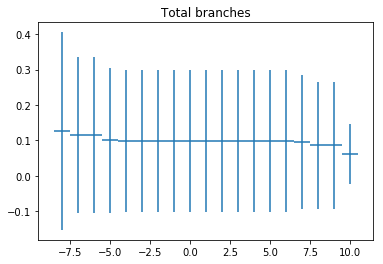

In [18]:
# Figure 3: Exposure to consolidation and local branch levels

df = pd.read_stata('data/replication_input.dta')
df.drop_duplicates(keep='first', inplace=True)
df=df.assign(event_year=lambda df:df.year-df.yr_approve)
index=list(df)
dfmean = pd.DataFrame(columns=range(-8, 10), index=index)
dfstd = pd.DataFrame(columns=range(-8, 10), index=index)
#df['cont_totalbranches']=(df['cont_totalbranches']-df['cont_totalbranches'].mean())/df['cont_totalbranches'].std()
df['cont_totalbranches']=(df['cont_totalbranches']-df['cont_totalbranches'].min())/(df['cont_totalbranches'].max()-df['cont_totalbranches'].min())
for i in range(-8, 11):
    dfmean[i]=df.loc[(df['event_year']==i) & df['overlap']==1].mean()
    dfstd[i]=df.loc[(df['event_year']==i) & df['overlap']==1].std()
dfmean=dfmean.T
dfstd=dfstd.T
mean=dfmean['cont_totalbranches']
std=dfstd['cont_totalbranches']
plt.errorbar(mean.index, mean, xerr=0.5, yerr=2*std, linestyle='')
plt.title('Total branches')
plt.show()  

Text(0.5, 1.0, 'New Mortgages')

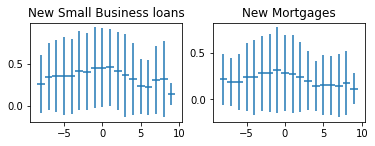

In [16]:
# Figure 4: Exposure to consolidation and the volume of new lending
plt.figure()

## Small Business Lending
df = pd.read_stata('data/replication_input.dta')
df.drop_duplicates(keep='first', inplace=True)
df=df.assign(event_year=lambda df:df.year-df.yr_approve)
index=list(df)
dfmean = pd.DataFrame(columns=range(-8, 10), index=index)
dfstd = pd.DataFrame(columns=range(-8, 10), index=index)
#df['NumSBL_Rev1']=(df['NumSBL_Rev1']-df['NumSBL_Rev1'].mean())/df['NumSBL_Rev1'].std()
df['NumSBL_Rev1']=(df['NumSBL_Rev1']-df['NumSBL_Rev1'].min())/(df['NumSBL_Rev1'].max()-df['NumSBL_Rev1'].min())
for i in range(-8, 11):
    dfmean[i]=df.loc[(df['event_year']==i) & df['overlap']==1].mean()
    dfstd[i]=df.loc[(df['event_year']==i) & df['overlap']==1].std()
dfmean=dfmean.T
dfstd=dfstd.T
mean=dfmean['NumSBL_Rev1']
std=dfstd['NumSBL_Rev1']
plt.subplot(2,2,1)
plt.errorbar(mean.index, mean, xerr=0.5, yerr=2*std, linestyle='')
plt.title('New Small Business loans')
#plt.show() 

## Mortgages
df = pd.read_stata('data/replication_input.dta')
df.drop_duplicates(keep='first', inplace=True)
df=df.assign(event_year=lambda df:df.year-df.yr_approve)
index=list(df)
dfmean = pd.DataFrame(columns=range(-8, 10), index=index)
dfstd = pd.DataFrame(columns=range(-8, 10), index=index)
#df['total_origin']=(df['total_origin']-df['total_origin'].mean())/df['total_origin'].std()
df['total_origin']=(df['total_origin']-df['total_origin'].min())/(df['total_origin'].max()-df['total_origin'].min())
for i in range(-8, 11):
    dfmean[i]=df.loc[(df['event_year']==i) & df['overlap']==1].mean()
    dfstd[i]=df.loc[(df['event_year']==i) & df['overlap']==1].std()
dfmean=dfmean.T
dfstd=dfstd.T
mean=dfmean['total_origin']
std=dfstd['total_origin']
plt.subplot(2,2,2)
plt.errorbar(mean.index, mean, xerr=0.5, yerr=2*std, linestyle='')
plt.title('New Mortgages')
#plt.show() 

c:\users\fabia\appdata\local\programs\python\python37\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
c:\users\fabia\appdata\local\programs\python\python37\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0.5, 1.0, 'New Mortgages')

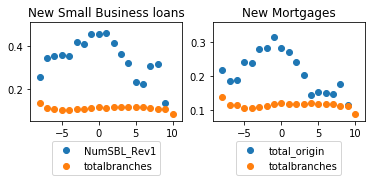

In [11]:
# Figure 5: The effect of subsequent bank entry on local credit supply
plt.figure()

## Small Business Lending
df = pd.read_stata('data/replication_input.dta')
df.drop_duplicates(keep='first', inplace=True)
df=df.assign(event_year=lambda df:df.year-df.yr_approve)
index=list(df)
dfmean = pd.DataFrame(columns=range(-8, 10), index=index)
#df['NumSBL_Rev1']=(df['NumSBL_Rev1']-df['NumSBL_Rev1'].mean())/df['NumSBL_Rev1'].std()
df['NumSBL_Rev1']=(df['NumSBL_Rev1']-df['NumSBL_Rev1'].min())/(df['NumSBL_Rev1'].max()-df['NumSBL_Rev1'].min())
df['totalbranches']=(df['totalbranches']-df['totalbranches'].min())/(df['totalbranches'].max()-df['totalbranches'].min())
for i in range(-8, 11):
    dfmean[i]=df.loc[(df['event_year']==i) & df['overlap']==1].mean()
dfmean=dfmean.T
mean=dfmean['NumSBL_Rev1']
plt.subplot(2,2,1)
plt.scatter(mean.index, mean)
plt.subplot(2,2,1)
plt.scatter(mean.index, dfmean['totalbranches'])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15))
plt.title('New Small Business loans')
#plt.show() 

## Mortgages
df = pd.read_stata('data/replication_input.dta')
df.drop_duplicates(keep='first', inplace=True)
df=df.assign(event_year=lambda df:df.year-df.yr_approve)
index=list(df)
dfmean = pd.DataFrame(columns=range(-8, 10), index=index)
#df['total_origin']=(df['total_origin']-df['total_origin'].mean())/df['total_origin'].std()
df['total_origin']=(df['total_origin']-df['total_origin'].min())/(df['total_origin'].max()-df['total_origin'].min())
df['totalbranches']=(df['totalbranches']-df['totalbranches'].min())/(df['totalbranches'].max()-df['totalbranches'].min())
for i in range(-8, 11):
    dfmean[i]=df.loc[(df['event_year']==i) & df['overlap']==1].mean()
dfmean=dfmean.T
mean=dfmean['total_origin']
plt.subplot(2,2,2)
plt.scatter(mean.index, mean)
plt.subplot(2,2,2)
plt.scatter(mean.index, dfmean['totalbranches'])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15))
plt.title('New Mortgages')
#plt.show() 

In [17]:
# Table 7: IV-Estimates of the effect of closings an local credit supply
df = pd.read_stata('data/replication_input.dta')
df.drop_duplicates(keep='first', inplace=True)
df=df.assign(event_year=lambda df:df.year-df.yr_approve)
index=list(df)
df['close_2yr']=0
df['close_2yr']=df['closed_branch'].loc[(df.event_year==0) | (df.event_year==1)]
df['close_2yr'].fillna(0, inplace=True)
df['POST']=df['event_year'].loc[df.event_year>0]
df['POST_close']=df.POST * df.close_2yr
df['POST_expose']= df.POST * df.overlap 

df['group_timeID']= df.groupby(['state_fps', 'cnty_fps', 'year']).grouper.group_info[0]
df['indivID']= df.groupby(['state_fps', 'cnty_fps', 'tractstring']).grouper.group_info[0]
df['clustID']= df.groupby(['state_fps', 'cnty_fps']).grouper.group_info[0] 
df.set_index(['indivID', 'group_timeID'], inplace=True)

## OLS
    # NumSBL_Rev1
    y, x = dmatrices('NumSBL_Rev1 ~ POST_close + popdensity + poptot + medincome + pminority + pcollege +  cont_totalbranches + cont_brgrowth', data=df)
    model_spec = sm.OLS(y, x)
    results = model_spec.fit(cov_type='HAC',cov_kwds={'maxlags':1})
    #model_spec = PanelOLS(temp.total_origin, temp[['D', 'popdensity', 'poptot', 'medincome', 'pminority', 'pcollege', 'cont_totalbranches', 'cont_brgrowth']], entity_effects=True)
    #results = model_spec.fit(cov_type='clustered', cluster_entity=True)
    print(results.summary())

    # AmtSBL_Rev1
    y, x = dmatrices('AmtSBL_Rev1 ~ POST_close + popdensity + poptot + medincome + pminority + pcollege +  cont_totalbranches + cont_brgrowth', data=df)
    model_spec = sm.OLS(y, x)
    results = model_spec.fit(cov_type='HAC',cov_kwds={'maxlags':1})
    #model_spec = PanelOLS(temp.total_origin, temp[['D', 'popdensity', 'poptot', 'medincome', 'pminority', 'pcollege', 'cont_totalbranches', 'cont_brgrowth']], entity_effects=True)
    #results = model_spec.fit(cov_type='clustered', cluster_entity=True)
    print(results.summary())

    # total_origin
    y, x = dmatrices('total_origin ~ POST_close + popdensity + poptot + medincome + pminority + pcollege +  cont_totalbranches + cont_brgrowth', data=df)
    model_spec = sm.OLS(y, x)
    results = model_spec.fit(cov_type='HAC',cov_kwds={'maxlags':1})
    #model_spec = PanelOLS(temp.total_origin, temp[['D', 'popdensity', 'poptot', 'medincome', 'pminority', 'pcollege', 'cont_totalbranches', 'cont_brgrowth']], entity_effects=True)
    #results = model_spec.fit(cov_type='clustered', cluster_entity=True)
    print(results.summary())

    # loan_amount
    y, x = dmatrices('loan_amount ~ POST_close + popdensity + poptot + medincome + pminority + pcollege +  cont_totalbranches + cont_brgrowth', data=df)
    model_spec = sm.OLS(y, x)
    results = model_spec.fit(cov_type='HAC',cov_kwds={'maxlags':1})
    #model_spec = PanelOLS(temp.total_origin, temp[['D', 'popdensity', 'poptot', 'medincome', 'pminority', 'pcollege', 'cont_totalbranches', 'cont_brgrowth']], entity_effects=True)
    #results = model_spec.fit(cov_type='clustered', cluster_entity=True)
    print(results.summary())    
    
## Reduced Form
    # NumSBL_Rev1
    y, x = dmatrices('total_origin ~ POST_expose + popdensity + poptot + medincome + pminority + pcollege +  cont_totalbranches + cont_brgrowth', data=df)
    model_spec = sm.OLS(y, x)
    results = model_spec.fit(cov_type='HAC',cov_kwds={'maxlags':1})
    #model_spec = PanelOLS(temp.total_origin, temp[['D', 'popdensity', 'poptot', 'medincome', 'pminority', 'pcollege', 'cont_totalbranches', 'cont_brgrowth']], entity_effects=True)
    #results = model_spec.fit(cov_type='clustered', cluster_entity=True)
    print(results.summary())

    # AmtSBL_Rev1
    y, x = dmatrices('AmtSBL_Rev1 ~ POST_expose + popdensity + poptot + medincome + pminority + pcollege +  cont_totalbranches + cont_brgrowth', data=df)
    model_spec = sm.OLS(y, x)
    results = model_spec.fit(cov_type='HAC',cov_kwds={'maxlags':1})
    #model_spec = PanelOLS(temp.total_origin, temp[['D', 'popdensity', 'poptot', 'medincome', 'pminority', 'pcollege', 'cont_totalbranches', 'cont_brgrowth']], entity_effects=True)
    #results = model_spec.fit(cov_type='clustered', cluster_entity=True)
    print(results.summary())

    # total_origin
    y, x = dmatrices('total_origin ~ POST_expose + popdensity + poptot + medincome + pminority + pcollege +  cont_totalbranches + cont_brgrowth', data=df)
    model_spec = sm.OLS(y, x)
    results = model_spec.fit(cov_type='HAC',cov_kwds={'maxlags':1})
    #model_spec = PanelOLS(temp.total_origin, temp[['D', 'popdensity', 'poptot', 'medincome', 'pminority', 'pcollege', 'cont_totalbranches', 'cont_brgrowth']], entity_effects=True)
    #results = model_spec.fit(cov_type='clustered', cluster_entity=True)
    print(results.summary())

    # loan_amount
    y, x = dmatrices('loan_amount ~ POST_expose + popdensity + poptot + medincome + pminority + pcollege +  cont_totalbranches + cont_brgrowth', data=df)
    model_spec = sm.OLS(y, x)
    results = model_spec.fit(cov_type='HAC',cov_kwds={'maxlags':1})
    #model_spec = PanelOLS(temp.total_origin, temp[['D', 'popdensity', 'poptot', 'medincome', 'pminority', 'pcollege', 'cont_totalbranches', 'cont_brgrowth']], entity_effects=True)
    #results = model_spec.fit(cov_type='clustered', cluster_entity=True)
    print(results.summary())
    
## IV ESTIMATION
    # NumSBL_Rev1 - IV2SLS.from_formula()
    y, x = dmatrices('NumSBL_Rev1 ~ popdensity + poptot + medincome + pminority + pcollege +  cont_totalbranches + cont_brgrowth + [POST_close ~ POST_expose]', data=df)
    model_spec = sm.OLS(y, x)
    results = model_spec.fit(cov_type='HAC',cov_kwds={'maxlags':1})
    #model_spec = PanelOLS(temp.total_origin, temp[['D', 'popdensity', 'poptot', 'medincome', 'pminority', 'pcollege', 'cont_totalbranches', 'cont_brgrowth']], entity_effects=True)
    #results = model_spec.fit(cov_type='clustered', cluster_entity=True)
    print(results.summary())

    # AmtSBL_Rev1
    y, x = dmatrices('AmtSBL_Rev1 ~ popdensity + poptot + medincome + pminority + pcollege +  cont_totalbranches + cont_brgrowth + [POST_close ~ POST_expose]', data=df)
    model_spec = sm.OLS(y, x)
    results = model_spec.fit(cov_type='HAC',cov_kwds={'maxlags':1})
    #model_spec = PanelOLS(temp.total_origin, temp[['D', 'popdensity', 'poptot', 'medincome', 'pminority', 'pcollege', 'cont_totalbranches', 'cont_brgrowth']], entity_effects=True)
    #results = model_spec.fit(cov_type='clustered', cluster_entity=True)
    print(results.summary())

    # total_origin
    y, x = dmatrices('total_origin ~ popdensity + poptot + medincome + pminority + pcollege +  cont_totalbranches + cont_brgrowth + [POST_close ~ POST_expose]', data=df)
    model_spec = sm.OLS(y, x)
    results = model_spec.fit(cov_type='HAC',cov_kwds={'maxlags':1})
    #model_spec = PanelOLS(temp.total_origin, temp[['D', 'popdensity', 'poptot', 'medincome', 'pminority', 'pcollege', 'cont_totalbranches', 'cont_brgrowth']], entity_effects=True)
    #results = model_spec.fit(cov_type='clustered', cluster_entity=True)
    print(results.summary())

    # loan_amount
    y, x = dmatrices('loan_amount ~ popdensity + poptot + medincome + pminority + pcollege +  cont_totalbranches + cont_brgrowth + [POST_close ~ POST_expose]', data=df)
    model_spec = sm.OLS(y, x)
    results = model_spec.fit(cov_type='HAC',cov_kwds={'maxlags':1})
    #model_spec = PanelOLS(temp.total_origin, temp[['D', 'popdensity', 'poptot', 'medincome', 'pminority', 'pcollege', 'cont_totalbranches', 'cont_brgrowth']], entity_effects=True)
    #results = model_spec.fit(cov_type='clustered', cluster_entity=True)
    print(results.summary())

IndentationError: unexpected indent (<ipython-input-17-c409c3d926fa>, line 20)